In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numba import njit

In [2]:
h_bar = 1.0
m = 0.067

N = 300
L = 100.0 / 0.05292
dx = L / N
to_meV = 27211.6

In [3]:
# Funkcja do obliczania energii stanu kwantowego w punkcie i
@njit
def HPsi(psi_i, i, V):
    return -h_bar**2/(2*m) * (psi_i[i+1] + psi_i[i-1] - 2*psi_i[i])/(dx**2) + V[i]*psi_i[i]

@njit
def HPsiArr(psi_i,V):
    x = np.zeros(N+1)
    for i in range(1,N):
        x[i] = HPsi(psi_i,i,V)
    return x

# Funkcja do obliczania wartosci losowej w zakresie -1...1 
@njit
def RandomPsi(N):
    return np.random.uniform(-1, 1, N)

# Funkcja metody iteracji w czasie urojonym
@njit
def IterPsi(psi_1, psi_2, V, alfa):
    for i in range(1,N):
        psi_1[i] = psi_2[i] - alfa*HPsi(psi_2, i, V)
    return psi_1
    
# Funkcja do obliczania normy z funkcji falowej
@njit
def NormPsi(psi):
    return psi / np.sqrt(np.sum(psi**2 * dx))

# Funkcja do obliczania wartosci oczekiwanej energii
@njit
def ExpE(psi_1, psi_2):
    return np.sum(psi_1 * psi_2 * dx)

# Zadanie 1.2

In [4]:
#pierwszy stan podstawowy teoria
teoria = h_bar**2 * np.pi**2 / (2*m*L**2)
teoria_ale_w_meV = teoria * to_meV
teoria_ale_w_meV

0.5612917984996039

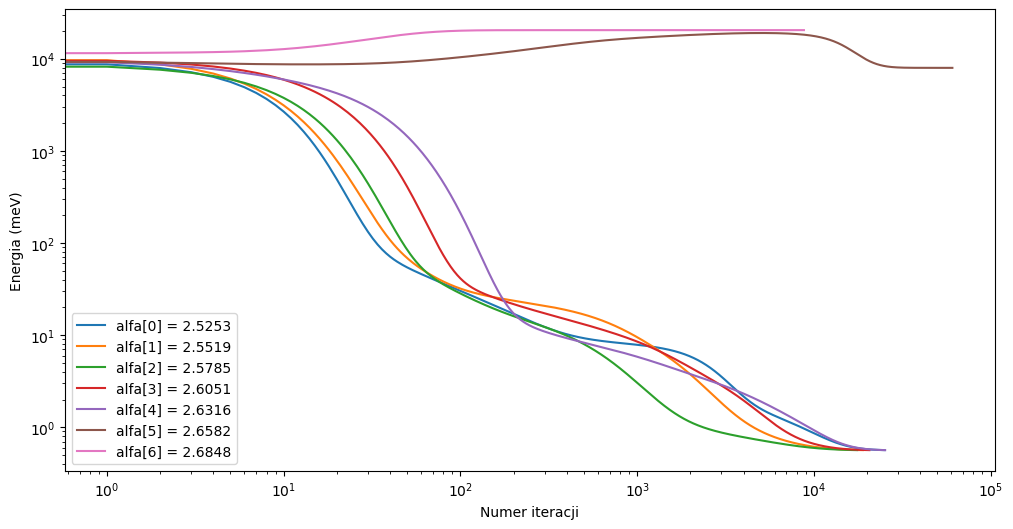

In [5]:
limit = m * dx**2 / h_bar**2
alfa = np.linspace(0.95 * limit, 1.01 * limit, 7)
V = np.zeros(N+1)

psi1 = np.zeros(N+1)
psi2 = RandomPsi(N+1)
h_psi = np.zeros(N+1)
Energies = []

plt.figure(figsize = (12,6))

# j = 0
# for i in range(len(alfa)):
#     for j in range(0,10001):
#         psi2 = IterPsi(psi1,psi2, V, alfa[i])
#         psi2 = NormPsi(psi2)
#         h_psi = HPsiArr(psi2,V)
#         E = ExpE(psi2, h_psi)
#         Energies.append(E)
#     psi2 = RandomPsi(N+1)
#     psi1 = np.zeros(N+1)

        

for i in range(len(alfa)):
    j = 0
    while True:
        psi2 = IterPsi(psi1,psi2, V, alfa[i])
        psi2 = NormPsi(psi2)
        h_psi = HPsiArr(psi2,V)
        E = ExpE(psi2, h_psi)
        Energies.append(E)
        if j > 4:
            if abs(Energies[j-1] - Energies[j-2]) < 1e-6/to_meV:
                break
        j = j + 1
    psi2 = RandomPsi(N+1)

    plt.plot(range(len(Energies)), np.array(Energies) * to_meV, label=f'alfa[{i}] = {alfa[i]:.4f}')
    plt.legend()
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Numer iteracji')
    plt.ylabel('Energia (meV)')
    #plt.title('Wartosc oczekiwana energii dla roznych parametrow alfa')
    Energies = []

# Zadanie 1.4

In [6]:
# Funkcja do obliczania funkcji ortogonalnej
@njit
def Excited(psi_2, psi_4):
    suma = np.sum(psi_2*psi_4*dx)
    psi_4 = psi_4 - suma * psi_2
    NormPsi(psi_4)
    return psi_4

In [13]:
psi1 = np.zeros(N+1)
psi2 = RandomPsi(N+1)
psi3 = np.zeros(N+1)
psi4 = RandomPsi(N+1)

# pp = np.zeros((10001, N+1))

plt.figure(figsize=(12, 6))
j = 0
# for i in range(0, 10001):
while True:
    psi2 = IterPsi(psi1, psi2, V, alfa[0])
    psi2 = NormPsi(psi2)
    psi4 = IterPsi(psi3, psi4, V, alfa[0])
    psi4 = NormPsi(psi4)
    psi4 = Excited(psi2, psi4)

    h_psi = HPsiArr(psi4, V)
    E = ExpE(psi4, h_psi)
    Energies.append(E)
    if j > 4:
        if abs(Energies[j-1] - Energies[j-2]) < 1e-6/to_meV:
            break
    j = j + 1
    
    
    if j % 2000 == 0:
        i = i+1
        x = i * 2000
        ax.set_axis_off()
        plt.plot(psi4)
        plt.title('i = {}'.format(x))

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

In [ ]:
# h_psi = np.zeros(N+1)
# Energies = []

# plt.figure(figsize = (12,6))

# j = 0

# while j < len(pp[:,1]):
#     h_psi = HPsiArr(pp[j], V)
#     E = ExpE(pp[j], h_psi)
#     Energies.append(E)
#     if abs(E - teoria) < 1e-6:
#         break
#     j = j + 1

# plt.plot(range(len(Energies)), np.array(Energies) * to_meV)
# plt.legend()
# plt.yscale('log')
# plt.xscale('log')
# plt.xlabel('Numer iteracji')
# plt.ylabel('Energia (meV)')

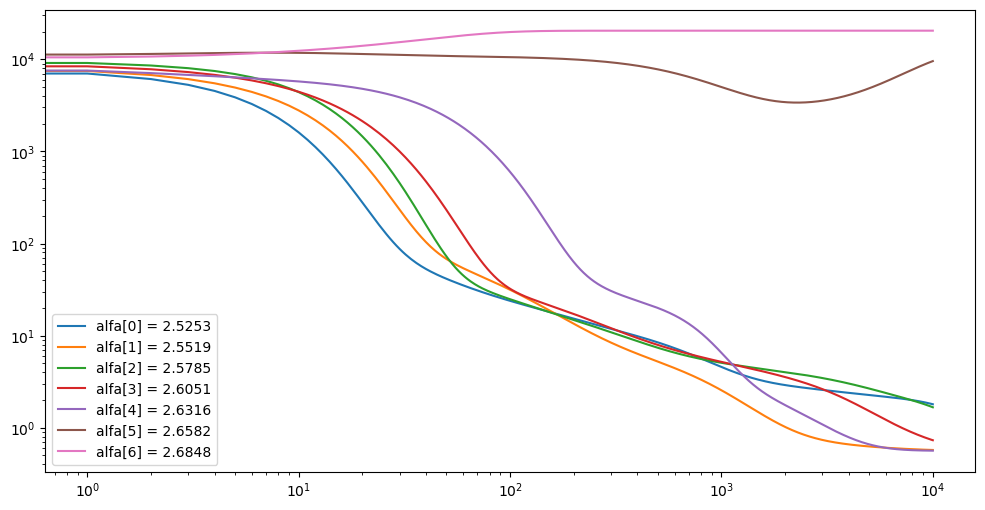

In [15]:
psi1 = np.zeros(N+1)
psi2 = RandomPsi(N+1)
h_psi = np.zeros(N+1)
Energies = []

plt.figure(figsize = (12,6))

for i in range(len(alfa)):
    for j in range(10001):
        psi2 = IterPsi(psi1,psi2, V, alfa[i])
        psi2 = NormPsi(psi2)
        h_psi = HPsiArr(psi2,V)
        E = ExpE(psi2, h_psi)
        Energies.append(E)
    psi2 = RandomPsi(N+1)
    psi1 = np.zeros(N+1)
    
    plt.plot(range(len(Energies)), np.array(Energies) * to_meV, label=f'alfa[{i}] = {alfa[i]:.4f}')
    plt.legend()
    plt.yscale('log')
    plt.xscale('log')
    #plt.title('Wartosc oczekiwana energii dla roznych parametrow alfa')
    Energies = []

# Zadanie 1.5

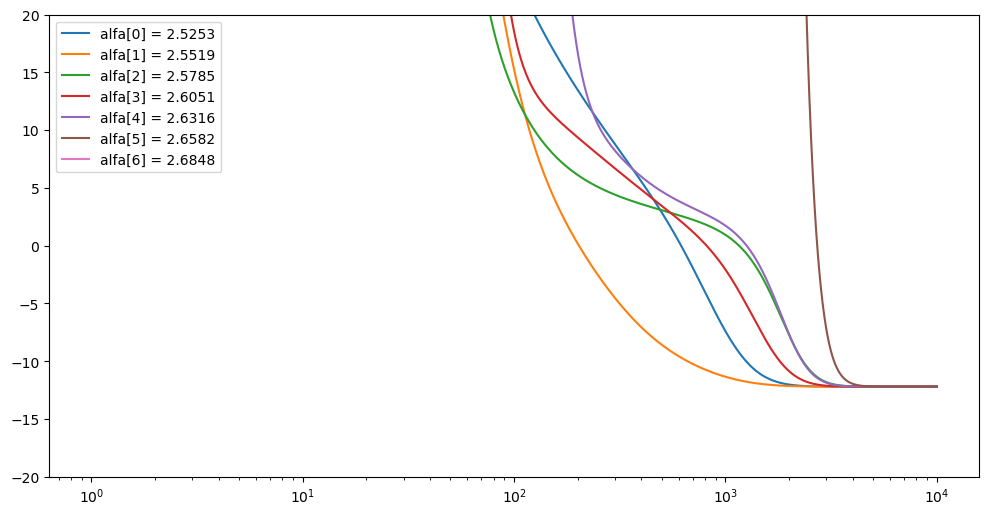

In [16]:
alfa = np.linspace(0.95 * m * dx**2 / h_bar**2, 1.01 * m * dx**2 / h_bar**2, 7)

psi1 = np.zeros(N+1)
psi2 = RandomPsi(N+1)
h_psi = np.zeros(N+1)
Energies = []

W = np.zeros(N+1)
W[N//2] = -500/to_meV

plt.figure(figsize = (12,6))

for i in range(len(alfa)):
    for j in range(10001):
        psi2 = IterPsi(psi1,psi2, W, alfa[i])
        psi2 = NormPsi(psi2)
        h_psi = HPsiArr(psi2,W)
        E = ExpE(psi2, h_psi)
        Energies.append(E)
    psi2 = RandomPsi(N+1)
    psi1 = np.zeros(N+1)
    
    plt.plot(range(len(Energies)), np.array(Energies) * to_meV, label=f'alfa[{i}] = {alfa[i]:.4f}')
    plt.legend()
    #plt.yscale('log')
    plt.ylim(-20,20)
    plt.xscale('log')
    #plt.title('Wartosc oczekiwana energii dla roznych parametrow alfa, gdzie W = 500 meV')
    Energies = []

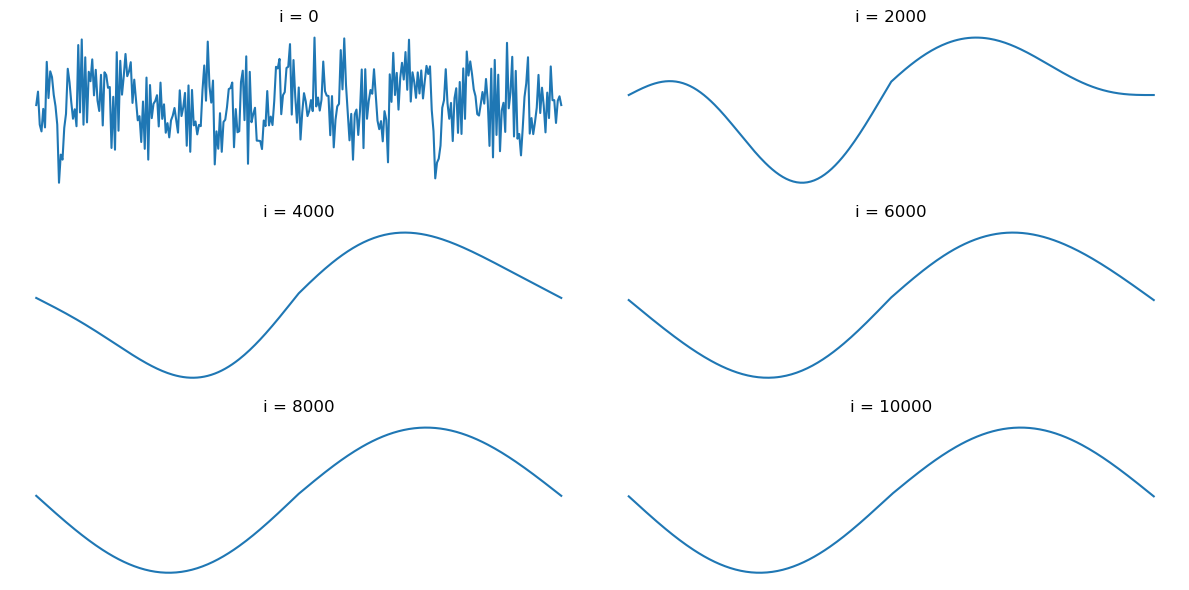

In [17]:
psi1 = np.zeros(N+1)
psi2 = RandomPsi(N+1)
psi3 = np.zeros(N+1)
psi4 = RandomPsi(N+1)

plt.figure(figsize=(12, 6))

for i in range(0, 10001):
    psi2 = IterPsi(psi1, psi2, W, alfa[0])
    psi2 = NormPsi(psi2)
    psi4 = IterPsi(psi3, psi4, W, alfa[0])
    psi4 = NormPsi(psi4)
    psi4 = Excited(psi2, psi4)

    if i % 2000 == 0:
        j = i // 2000
        axs = plt.subplot(3, 2, j + 1)
        axs.set_axis_off()
        plt.plot(psi4)
        plt.title('i = {}'.format(i))

plt.tight_layout()
plt.show()
